The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images. This image taken from the CIFAR repository. This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset.

In [5]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [6]:
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

In [8]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_test.shape

(10000, 1)

# **Distribution of Data** 

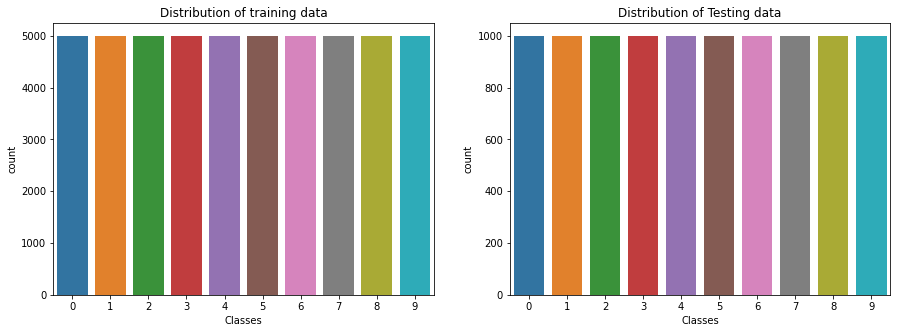

In [13]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])                                                 ## ravel()- used for flatten the array
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')

# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

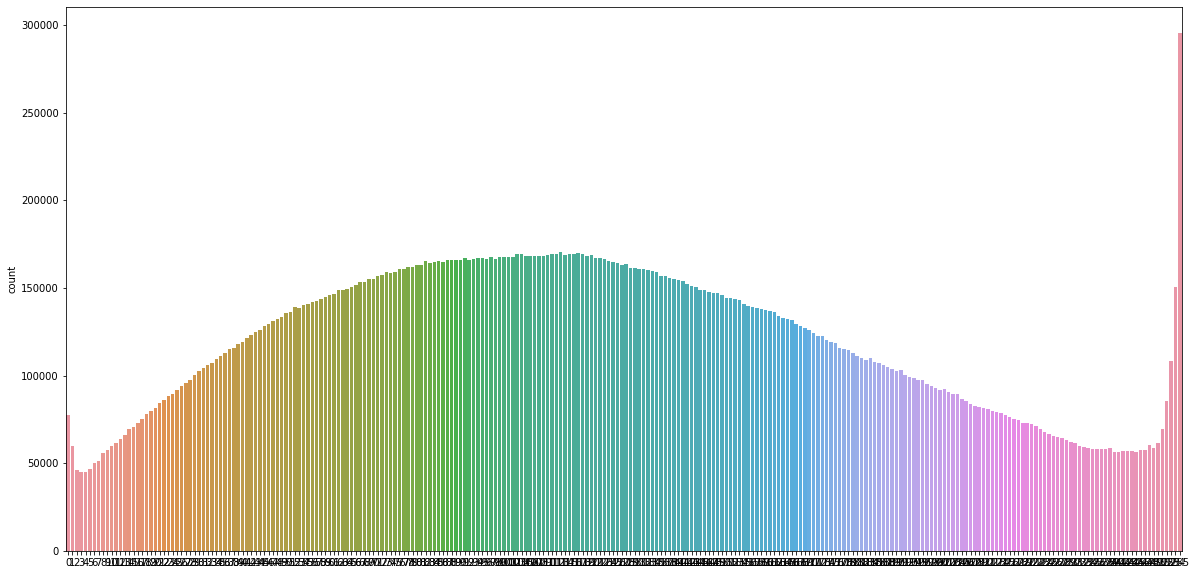

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x_test.ravel())

In [15]:
# Normalize the data. Before we need to convert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
# Convert class vectors to binary class matrices. This is called one hot encoding.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Defining convolutional layer

In [18]:
#define the convnet

model = Sequential()

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


In [19]:
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [20]:
# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

# Model training

### Before making network ready for training we have to make sure to add below things:

**A loss function**: to measure how good the network is

**An optimizer**: to update network as it sees more data and reduce loss value

**Metrics**: to monitor performance of network

In [22]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [23]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=30,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 314us/step - loss: 1.8343 - accuracy: 0.3305 - val_loss: 1.5281 - val_accuracy: 0.4533
Epoch 2/30
50000/50000 [==============================] - 9s 186us/step - loss: 1.5063 - accuracy: 0.4513 - val_loss: 1.3471 - val_accuracy: 0.5123
Epoch 3/30
50000/50000 [==============================] - 9s 186us/step - loss: 1.3574 - accuracy: 0.5124 - val_loss: 1.3085 - val_accuracy: 0.5397
Epoch 4/30
50000/50000 [==============================] - 9s 187us/step - loss: 1.2544 - accuracy: 0.5528 - val_loss: 1.1688 - val_accuracy: 0.5844
Epoch 5/30
50000/50000 [==============================] - 9s 187us/step - loss: 1.1724 - accuracy: 0.5836 - val_loss: 1.1140 - val_accuracy: 0.6075
Epoch 6/30
50000/50000 [==============================] - 9s 186us/step - loss: 1.1096 - accuracy: 0.6083 - val_loss: 1.0097 - val_accuracy: 0.6469
Epoch 7/30
50000/50000 [==============================] - 9s 

In [28]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

10000/10000 [==============================] - 1s 86us/step
Test loss: 0.6676541774749756
Test accuracy: 0.7716000080108643


In [29]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)


# Check The predictions

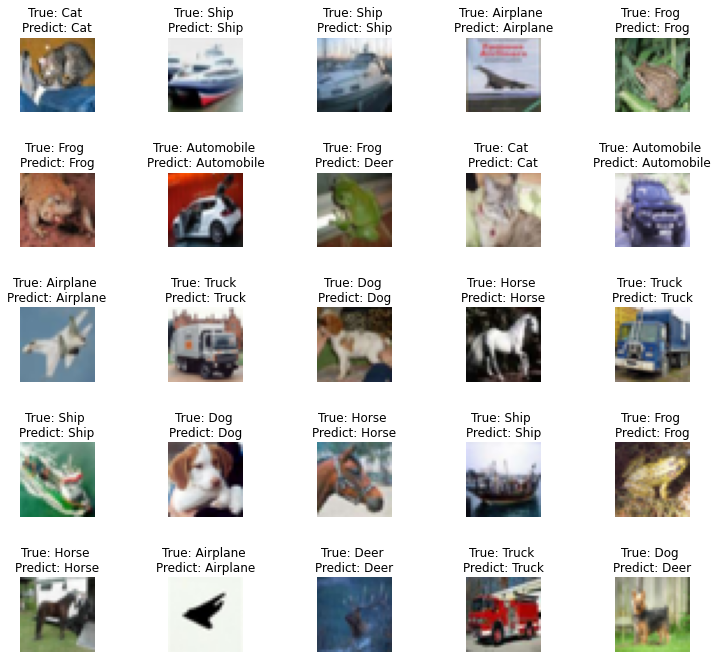

In [30]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, 5*5):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
